## Sentiment Classification of IMDb Reviews

In [1]:
#Downloaded dataset from Kaggle.
#To Build an end-to-end NLP pipeline to classify movie reviews as positive or negative.


#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from nltk.corpus import stopwords
import nltk

import warnings
warnings.filterwarnings('ignore')

In [3]:
#pip install spacy
#!python -m spacy download en_core_web_sm


In [4]:
#ls

In [5]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.shape

(50000, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
print(data['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


#### Cleaning text
#### Removing punctuation/stopwords, and tokenize

In [9]:
import re
import spacy
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
def clean_text(text):
    # lowercase the text
    text = text.lower()

     # remove HTML tags
    text = re.sub(r"<.*?>", "", text) 

    # remove numbers/punctuation
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

In [11]:
data['clean_review'] = data['review'].apply(clean_text)

In [12]:
data

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...
...,...,...,...
49995,I thought this movie did a down right good job...,positive,thought movie right good job creative original...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary schools n...
49998,I'm going to have to disagree with the previou...,negative,going disagree previous comment side maltin on...


#### Label Encoding the Sentiment column/Target

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# positive=1, negative=0

In [15]:
labe = LabelEncoder()
data['sentiment_label'] = labe.fit_transform(data['sentiment'])

In [16]:
data.head()

,review,sentiment,clean_review,sentiment_label
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...,1
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,1
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,1
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,1


### Train and test

In [17]:
from sklearn.model_selection import train_test_split

X = data['clean_review']
y = data['sentiment_label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### TFidf vectorizer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit on training data and transform it into numerical features
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf.transform(X_test)

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
lr = LogisticRegression(solver='liblinear')
#liblinear is good for small to medium datasets and binary classification

In [22]:
'''
X_train_tfidf is the matrix of TF-IDF features from your training reviews.
y_train is the target variable (0 for negative, 1 for positive).
'''

'\nX_train_tfidf is the matrix of TF-IDF features from your training reviews.\ny_train is the target variable (0 for negative, 1 for positive).\n'

In [23]:
lr.fit(X_train_tfidf, y_train)

LogisticRegression(solver='liblinear')

In [24]:
y_pred_lr = lr.predict(X_test_tfidf)

In [25]:
'''
accuracy_score: proportion of correctly predicted reviews.
classification_report: shows precision, recall, F1-score, and support for each class.

Precision: how many predicted positives are actually positive.
Recall: how many actual positives were correctly predicted.
F1-score: harmonic mean of precision and recall.
'''

'\naccuracy_score: proportion of correctly predicted reviews.\nclassification_report: shows precision, recall, F1-score, and support for each class.\n\nPrecision: how many predicted positives are actually positive.\nRecall: how many actual positives were correctly predicted.\nF1-score: harmonic mean of precision and recall.\n'

In [26]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8924
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



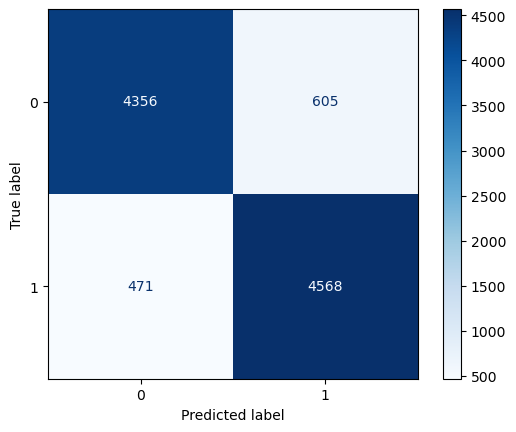

In [27]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Blues')
plt.show()

In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [29]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [30]:
# Perform cross-validation
scores = cross_val_score(lr, X_train_tfidf, y_train, cv=cv, scoring='f1', n_jobs=-1)

# Print results
print("--- Logistic Regression Cross Validation---")
print("F1-scores for each fold:", scores)
print(f"Mean F1-score: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

--- Logistic Regression Cross Validation---
F1-scores for each fold: [0.89218497 0.89173718 0.89568123 0.88697577 0.89258661]
Mean F1-score: 0.8918
Standard Deviation: 0.0028


### Naive Bayes (MultinomialNB)

In [31]:
#Text classification → MultinomialNB (designed for discrete counts/frequencies)
#Numeric continuous features → GaussianNB

In [32]:
from sklearn.naive_bayes import MultinomialNB


In [33]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)


MultinomialNB()

In [34]:
y_pred_nb = nb.predict(X_test_tfidf)

In [35]:
print(" Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


 Accuracy: 0.8575
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



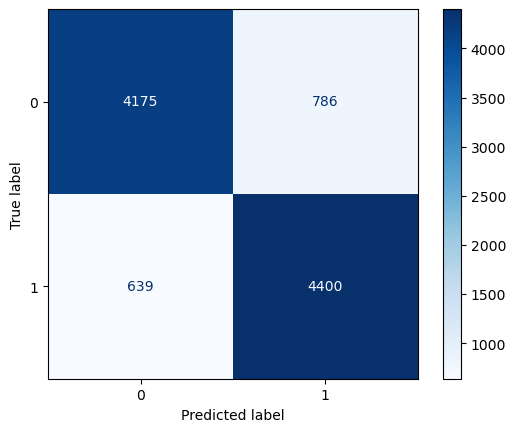

In [36]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, cmap='Blues')
plt.show()

In [37]:
#Cross Validation

# Define 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation on training data
scores = cross_val_score(nb, X_train_tfidf, y_train, cv=cv, scoring='f1', n_jobs=-1)


In [38]:
print("--- Naive Bayes(MultinomialNB) Cross-Validation ---")
print("F1-scores for each fold:", scores)
print(f"Mean F1-score: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

--- Naive Bayes(MultinomialNB) Cross-Validation ---
F1-scores for each fold: [0.86055183 0.86506561 0.86655968 0.86142962 0.86166008]
Mean F1-score: 0.8631
Standard Deviation: 0.0023


### XGBOOST

In [39]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1)
xgb.fit(X_train_tfidf, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, ...)

In [40]:
y_pred = xgb.predict(X_test_tfidf)


In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8585
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4961
           1       0.85      0.88      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



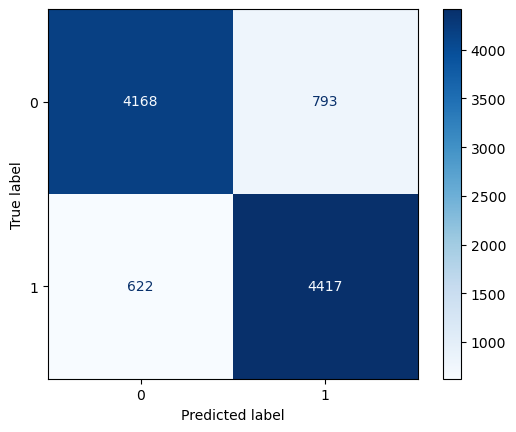

In [42]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.show()

In [ ]:
#Logistic Regression is best compared to these 2 models based on Classification Report

In [43]:
# Using Modular pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [44]:
# Logistic Regression
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear'))
])

# Linear SVM
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

# Multinomial NB
nb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])


In [46]:
#Hyperparameter Grids

lr_param_grid = {
    'tfidf__max_features': [2000, 5000],
    'tfidf__ngram_range': [(1,1)],
    'clf__C': [0.1, 1, 10]
}

svm_param_grid = {
    'tfidf__max_features': [2000, 5000],
    'tfidf__ngram_range': [(1,1)],
    'clf__C': [0.1, 1, 10]
}

nb_param_grid = {
    'tfidf__max_features': [2000, 5000],
    'tfidf__ngram_range': [(1,1)],
    'clf__alpha': [0.5, 1.0]
}

In [47]:
#Hyperparamter tuning

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

def tune_model(pipeline, param_grid, X_train, y_train):
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    print("Best parameters:", grid.best_params_)
    return grid



In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
best_lr = tune_model(lr_pipeline, lr_param_grid, X_train, y_train)
best_svm = tune_model(svm_pipeline, svm_param_grid, X_train, y_train)
best_nb = tune_model(nb_pipeline, nb_param_grid, X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'clf__C': 1, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters: {'clf__C': 0.1, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters: {'clf__alpha': 1.0, 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 1)}


In [50]:
#Evaluating tunned model and plotting

In [51]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()



--- Logistic Regression ---
Accuracy: 0.8921
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



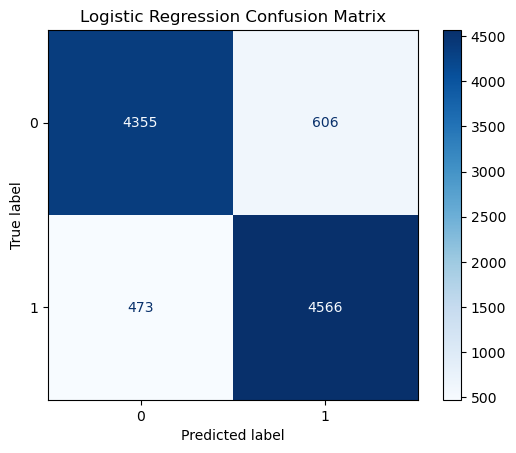

--- Linear SVM ---
Accuracy: 0.8921
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



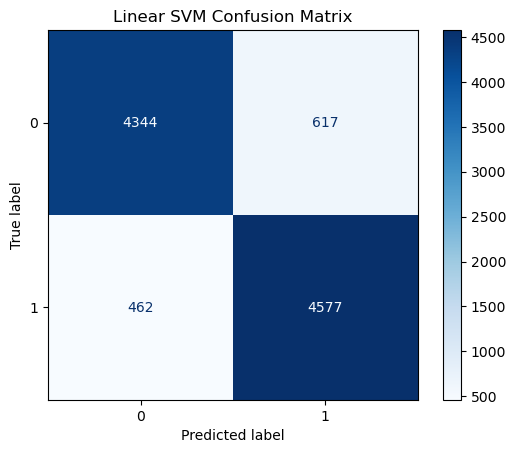

--- Multinomial NB ---
Accuracy: 0.8551
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



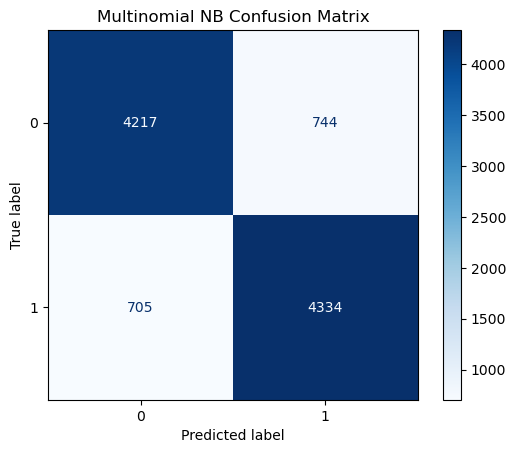

In [52]:
evaluate_model(best_lr, X_test, y_test, "Logistic Regression")
evaluate_model(best_svm, X_test, y_test, "Linear SVM")
evaluate_model(best_nb, X_test, y_test, "Multinomial NB")

### Best Model Selection

After evaluating all three models on the IMDb sentiment dataset, Logistic Regression was selected as the best model. 
Both Logistic Regression and Linear SVM achieved the same high accuracy (0.892) and balanced F1-score (0.89) across positive and negative classes,
while Multinomial Naive Bayes lagged slightly behind (accuracy 0.855, F1-score 0.86). 
